# Setup

In [49]:
import numpy as np
import pandas as pd
import sidetable

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, scale, PowerTransformer

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from yellowbrick.cluster import kelbow_visualizer

# Set output as pandas
from sklearn import set_config
set_config(transform_output="pandas")

In [50]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

# Etapa 01) Análise exploratória dos dados

## Data Understanding

In [51]:
df = pd.read_csv('../data/data.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [52]:
df.shape

(541909, 8)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [54]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [55]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [56]:
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [57]:
df.duplicated().sum()

5268

c:\Users\Rodrigo\anaconda3\envs\desafio_final\lib\site-packages\seaborn\categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



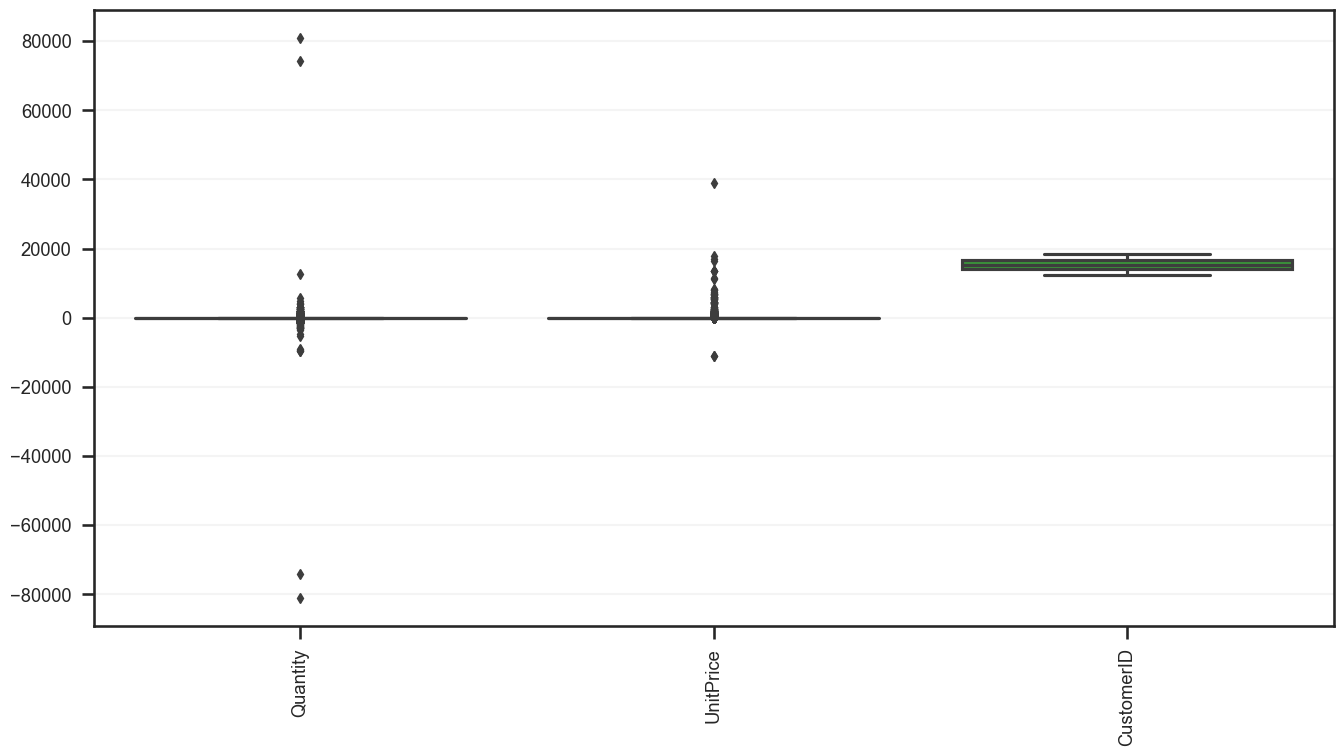

In [58]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

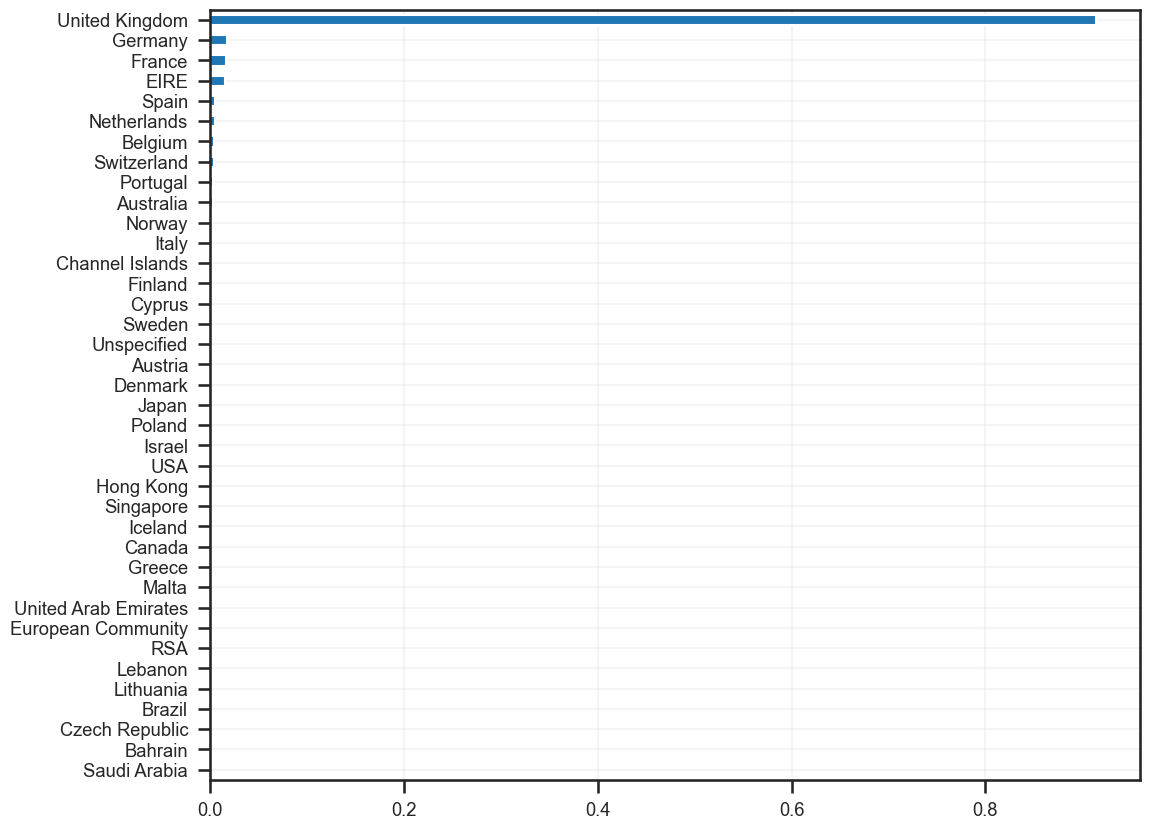

In [59]:
df['Country'].value_counts(normalize=True, ascending=True).plot.barh(figsize=(12,10));

In [60]:
df.stb.freq(['Country'])

,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,495478,91.431956,495478,91.431956
1,Germany,9495,1.752139,504973,93.184095
2,France,8557,1.579047,513530,94.763143
3,EIRE,8196,1.512431,521726,96.275574
4,Spain,2533,0.467422,524259,96.742996
5,Netherlands,2371,0.437527,526630,97.180523
6,Belgium,2069,0.381798,528699,97.562321
7,Switzerland,2002,0.369435,530701,97.931756
8,Portugal,1519,0.280305,532220,98.212061
9,Australia,1259,0.232327,533479,98.444388


# Etapa 02) Pré-processamento dos dados

## Data Cleaning

In [61]:
dataframe = df.copy()

In [62]:
dataframe.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [63]:
dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [64]:
dataframe = dataframe.dropna(subset=['CustomerID'])

In [65]:
dataframe.stb.missing()

,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


In [66]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [67]:
dataframe['CustomerID'] = dataframe['CustomerID'].astype(int)
dataframe['Country'] = dataframe['Country'].astype('category')

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_16012\3400776563.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_16012\3400776563.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 23.7+ MB


In [69]:
dataframe.InvoiceDate.agg(['min','max'])

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [70]:
below0 = dataframe[['Quantity','UnitPrice']].le(0).any(axis=1)
dataframe = dataframe[~below0].copy()

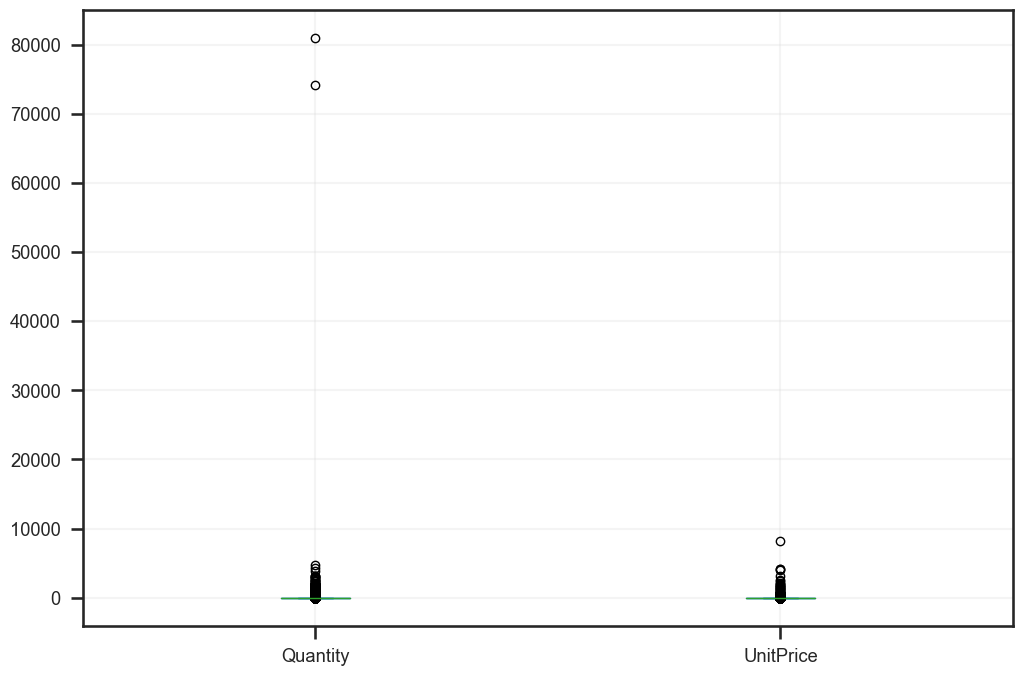

In [71]:
dataframe[['Quantity','UnitPrice']].plot.box();

In [72]:
dataframe.query('Quantity>10_000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


<AxesSubplot:>

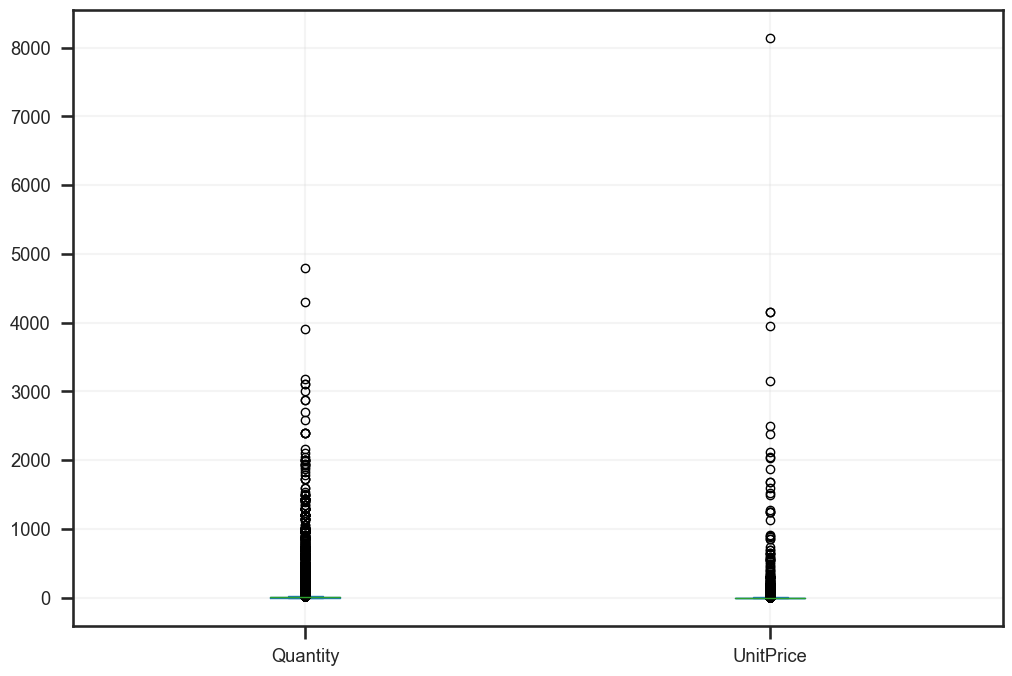

In [73]:
dataframe.query('Quantity<10_000')[['Quantity','UnitPrice']].plot.box()

In [74]:
dataframe.query('UnitPrice>8_000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [75]:
dataframe = dataframe.query('Quantity<10_000 & UnitPrice<8_000').copy()

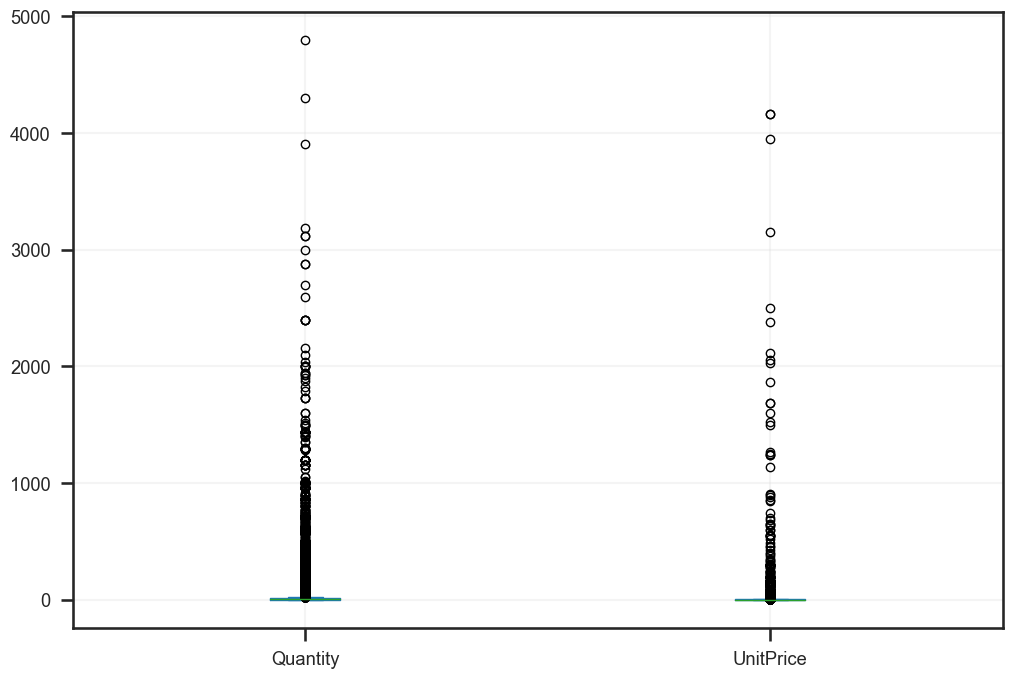

In [76]:
dataframe[['Quantity','UnitPrice']].plot.box();

In [77]:
dataframe['TotalPrice'] = dataframe['Quantity'] * dataframe['UnitPrice']

In [78]:
dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## RFM

In [79]:
df_rfm = (
    dataframe.groupby('CustomerID')
    .agg(
        Recency=('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days),
        Frequency=('InvoiceNo','nunique'),
        Monetary=('TotalPrice','mean')
    )
)

df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
12352,58,8,29.482824


Recency (R): Refere-se ao tempo decorrido desde a última compra do cliente. (Levando em consideração a data do dia 01/01/2012)

Frequency (F): Indica com que frequência o cliente faz compras. 

Monetary (M) / Value (V): Representa o valor total gasto pelo cliente em suas compras. 

<AxesSubplot:>

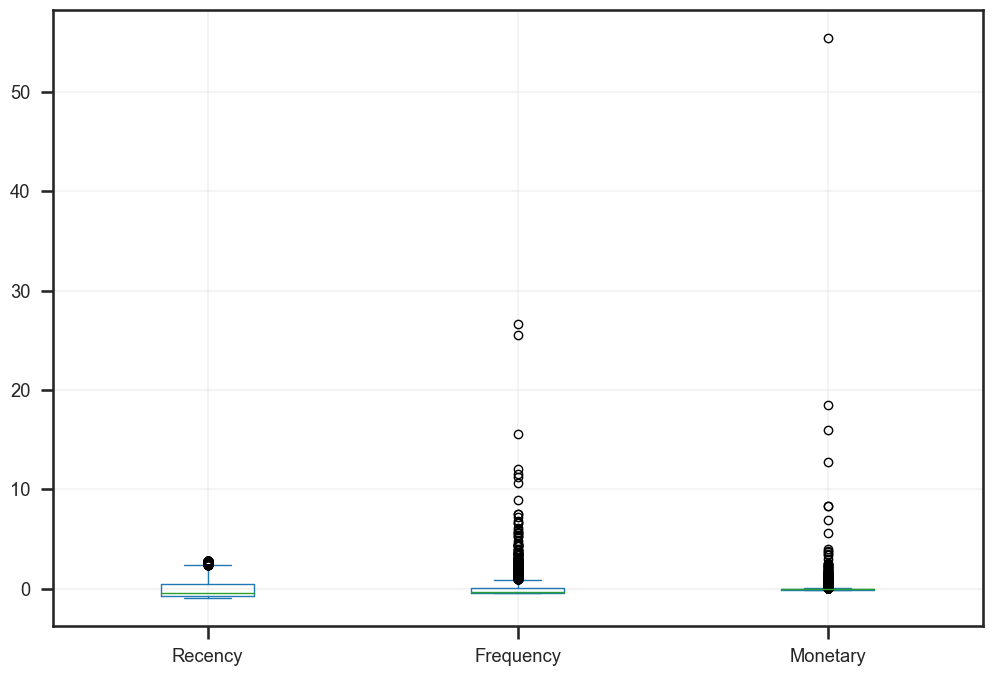

In [80]:
df_rfm.apply(scale).plot.box()

In [81]:
df_rfm.apply(scale).query('Monetary>50')

,Recency,Frequency,Monetary
CustomerID,,,
15098,0.899878,-0.165317,55.434876


In [82]:
df_rfm = df_rfm.drop(15098)

<AxesSubplot:>

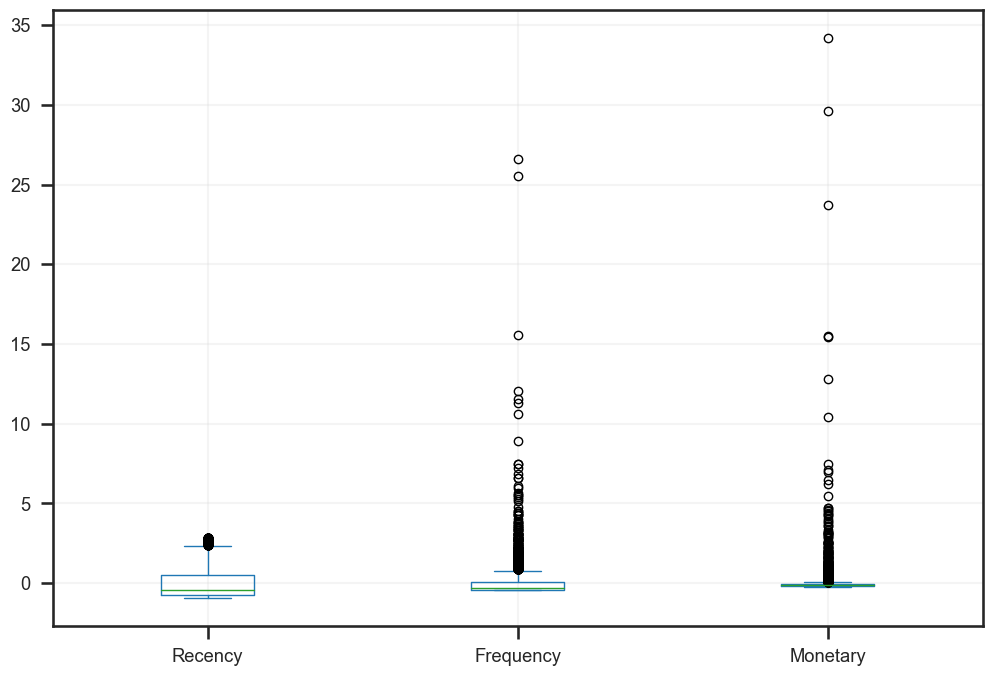

In [83]:
df_rfm.apply(scale).plot.box()

In [84]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,4336.000000,4336.000000,4336.000000
mean,114.032288,4.272601,34.554185
std,99.968352,7.697927,129.202663
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,395.000000,209.000000,4453.430000


In [85]:
df_rfm_clip = df_rfm.apply(lambda x: x.clip(upper=x.quantile(.95)))
df_rfm_clip.describe()

,Recency,Frequency,Monetary
count,4336.000000,4336.000000,4336.000000
mean,112.248155,3.608164,23.634656
std,95.504576,3.358999,20.993635
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,333.000000,13.000000,91.768421


In [86]:
df_rfm_clip_scaled = df_rfm_clip.apply(scale)

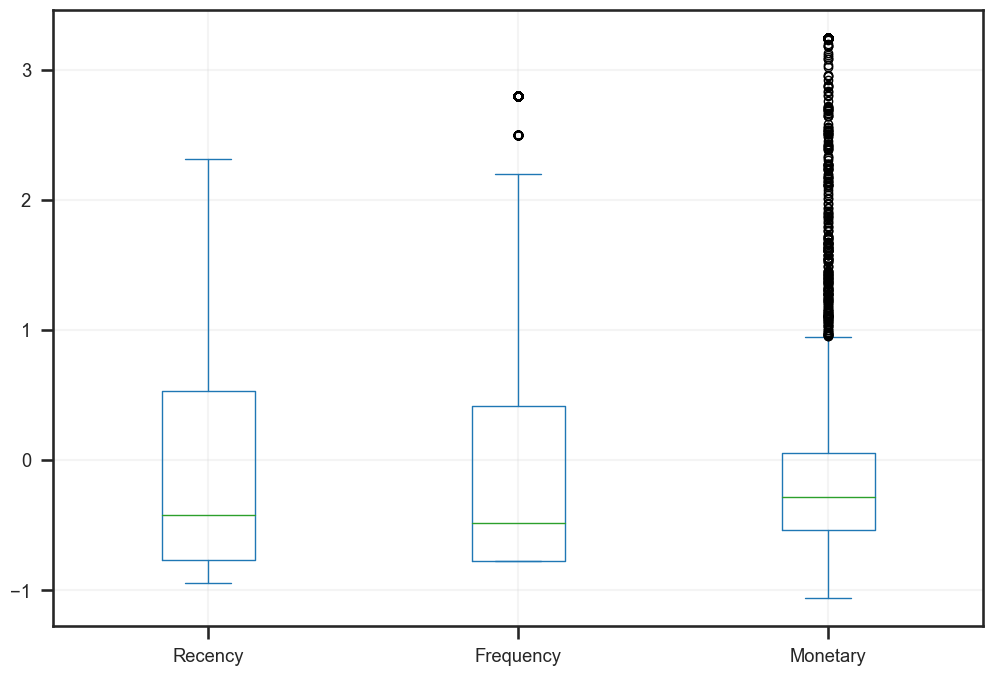

In [87]:
df_rfm_clip_scaled.plot.box();

# Etapa 03) Selecione um algoritmo de clusterização

## K-means

c:\Users\Rodrigo\anaconda3\envs\desafio_final\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Rodrigo\anaconda3\envs\desafio_final\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Rodrigo\anaconda3\envs\desafio_final\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Rodrigo\anaconda3\envs\desafio_final\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Rodrigo\anaconda3\envs\

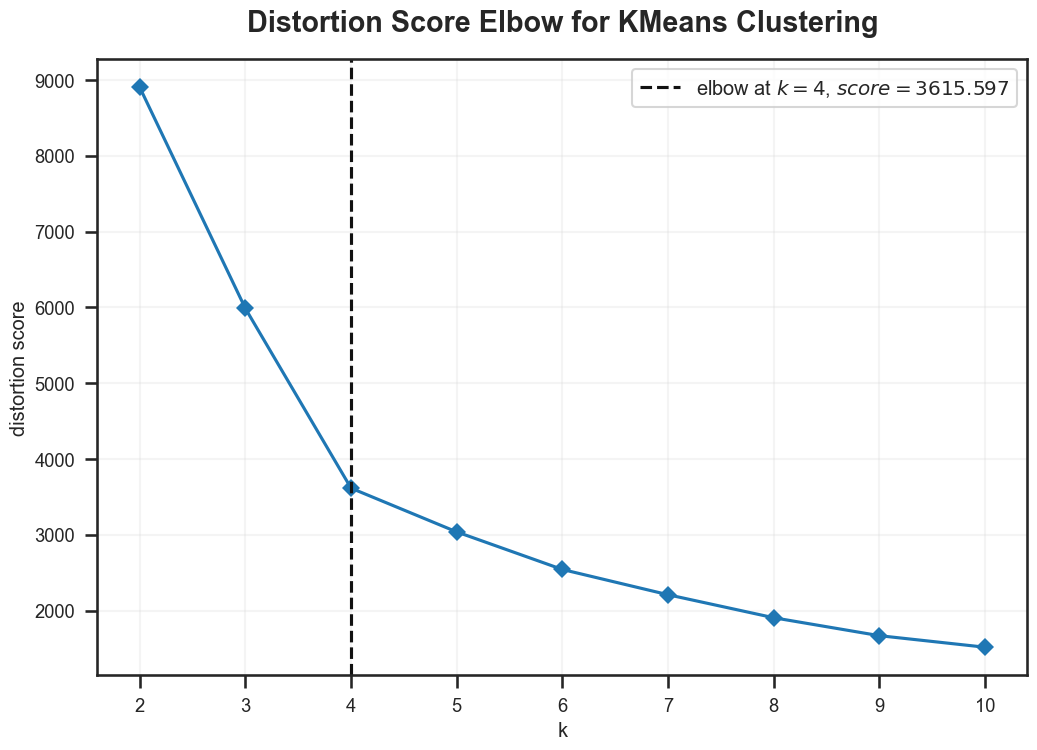

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [88]:
kelbow_visualizer(KMeans(), df_rfm_clip_scaled, k=10, timings=False)

In [89]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaled.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

c:\Users\Rodrigo\anaconda3\envs\desafio_final\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Rodrigo\anaconda3\envs\desafio_final\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Rodrigo\anaconda3\envs\desafio_final\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Rodrigo\anaconda3\envs\desafio_final\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Rodrigo\anaconda3\envs\

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,8906.589803,0.382311,1.065369,1995.770793
3,5987.858046,0.434196,0.858749,2539.996344
4,3615.604890,0.479553,0.704462,3751.144746
5,3038.351886,0.484991,0.737341,3552.793389
6,2542.498169,0.398087,0.851009,3564.654984
7,2209.186985,0.376864,0.870175,3526.795460
8,1907.066277,0.383598,0.862066,3599.016667
9,1668.785587,0.394119,0.800873,3675.190014
10,1516.641890,0.351595,0.887744,3641.963320


In [90]:
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfm_clip_scaled)

c:\Users\Rodrigo\anaconda3\envs\desafio_final\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Etapa 04) Analise os clusters obtidos

In [93]:
df_rfm_clip['Cluster'] = kmeans_labels

In [95]:
px.scatter_3d(df_rfm_clip, x='Recency', y='Frequency', z='Monetary', color=kmeans_labels.astype(str), template='plotly_dark')

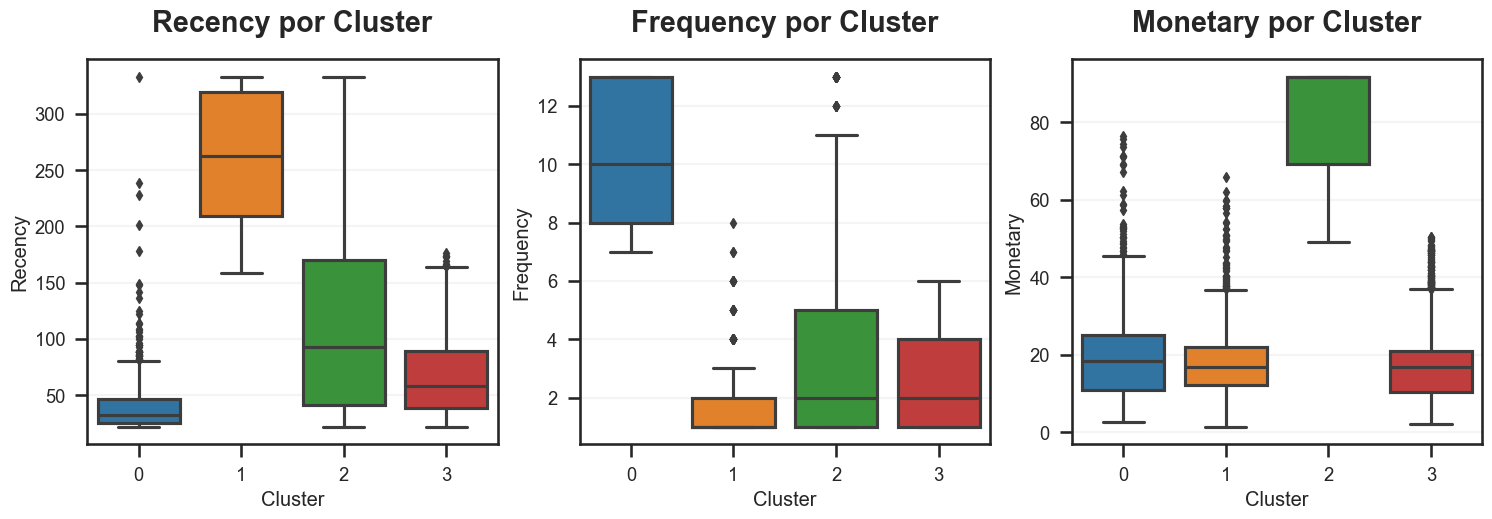

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x=df_rfm_clip['Cluster'], y=df_rfm_clip['Recency'], ax=axes[0])
axes[0].set_title('Recency por Cluster')

sns.boxplot(x=df_rfm_clip['Cluster'], y=df_rfm_clip['Frequency'], ax=axes[1])
axes[1].set_title('Frequency por Cluster')

sns.boxplot(x=df_rfm_clip['Cluster'], y=df_rfm_clip['Monetary'], ax=axes[2])
axes[2].set_title('Monetary por Cluster')

plt.show()

📌 Análise de Outliers nos Clusters

Os boxplots mostram a presença de outliers em todas as métricas (Recency, Frequency e Monetary). Vamos analisar cada caso:


1️⃣ Outliers em Recency

O Cluster 0 tem alguns outliers com recência muito alta (clientes que passaram muito tempo sem comprar, mas voltaram recentemente).

O Cluster 1 apresenta muitos outliers para recência alta, reforçando que alguns clientes estão extremamente inativos.

O Cluster 2 e o Cluster 3 também têm outliers, mas com menor impacto.

✅ Interpretação: Os outliers de recência indicam que há clientes que passaram muito tempo sem comprar e podem precisar de estratégias de reativação personalizadas.


2️⃣ Outliers em Frequency

O Cluster 0 apresenta alguns outliers de alta frequência, indicando clientes que compram muito acima da média.

O Cluster 2 também tem outliers para frequência elevada, o que pode significar um subgrupo de clientes altamente engajados.

O Cluster 1 e 3 possuem poucos outliers, o que reforça a baixa frequência de compra desses grupos.

✅ Interpretação: Os outliers de frequência representam clientes muito engajados que podem ser tratados como VIPs ou clientes estratégicos.


3️⃣ Outliers em Monetary

O Cluster 2 tem os outliers mais elevados, indicando clientes que gastam muito mais que a média.

O Cluster 0, 1 e 3 também apresentam alguns outliers, mas com valores bem mais baixos em comparação com o Cluster 2.

✅ Interpretação: Os outliers de monetary podem indicar clientes premium que realizam compras muito maiores que o restante. Esses clientes podem ser alvo de programas de fidelidade diferenciados para aumentar o lifetime value.


🎯 Conclusão Final sobre Outliers

Os outliers identificados representam dois perfis principais:

1️⃣ Clientes VIPs (outliers positivos) → Compram com alta frequência e gastam muito. Estratégia: ofertas exclusivas e programas de fidelidade.

2️⃣ Clientes inativos extremos (outliers negativos) → Passam muito tempo sem comprar. Estratégia: reativação via campanhas personalizadas.

In [94]:
df_clusters = df_rfm_clip.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median']
}).round(2)

print(df_clusters)

        Recency        Frequency        Monetary       
           mean median      mean median     mean median
Cluster                                                
0         41.52   32.0     10.19   10.0    20.43  18.38
1        261.08  263.0      1.51    1.0    18.10  16.85
2        121.06   93.0      3.88    2.0    80.71  91.77
3         67.52   58.0      2.70    2.0    17.12  16.82


# Etapa 05) Interpretação dos resultados obtidos

🔹 Cluster 0 – Clientes Frequentes (41 dias, 10 compras, 20 de gasto médio)

🟢 Perfil: Compram com frequência e fazem pedidos regulares, mas com um ticket médio não tão alto.

🔹 Ações recomendadas:

✅ Oferecer programas de fidelidade para aumentar o ticket médio.

✅ Recomendar produtos complementares com cross-sell e up-sell.

✅ Manter o engajamento com promoções exclusivas.

🔹 Cluster 1 – Clientes Inativos (261 dias, 1.5 compras, 18 de gasto médio)

🔴 Perfil: Fazem uma compra ocasionalmente e depois somem, indicando um risco de churn alto.

🔹 Ações recomendadas:

✅ Campanhas de reativação (e-mails com cupons de desconto).

✅ Notificações personalizadas para lembrar desses clientes.

✅ Criar uma oferta especial para incentivar uma nova compra.

🔹 Cluster 2 – Clientes de Alto Valor (121 dias, 3.88 compras, 80 de gasto médio)

🟡 Perfil: Não compram com altíssima frequência, mas quando compram, gastam muito.

🔹 Ações recomendadas:

✅ Criar um programa VIP para esses clientes.

✅ Descontos exclusivos para recompensar o alto ticket médio.

✅ Enviar ofertas personalizadas com base nos produtos que costumam comprar.

🔹 Cluster 3 – Clientes Ocasionais (67 dias, 2.7 compras, 17 de gasto médio)

🔵 Perfil: Compram de forma esporádica e gastam pouco.

🔹 Ações recomendadas:

✅ Criar campanhas de sazonalidade (promoções em datas comemorativas).

✅ Incentivar a recompra com e-mails de lembrete.

✅ Testar ofertas com frete grátis para aumentar o volume de compras.

📌 Conclusão Final

1️⃣ O cluster 2 (clientes de alto valor) deve ser o foco para retenção com benefícios exclusivos.

2️⃣ O cluster 1 (inativos) precisa de uma estratégia forte de reativação para evitar churn.

3️⃣ O cluster 0 (frequentes) tem potencial de crescimento, bastando aumentar o ticket médio.

4️⃣ O cluster 3 (ocasional) pode ser mais explorado para incentivar recorrência.